# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
load_dotenv()

Python-dotenv could not parse statement starting at line 6


True

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
NewsAPI = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_Headlines = NewsAPI.get_everything(
        q="Bitcoin",
        language= "en",
        sort_by="relevancy"
)
print(f"Total Articles about Bitcoin: {Bitcoin_Headlines['totalResults']}")
Bitcoin_Headlines["articles"][0]

Total Articles about Bitcoin: 4571


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
 'publishedAt': '2020-12-03T22:00:00Z',
 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'}

In [5]:
# Fetch the Ethereum news articles
Ethereum_Headlines = NewsAPI.get_everything(
        q="Ethereum",
        language= "en",
        sort_by="relevancy"
)
print(f"Total Articles about Ethereum: {Ethereum_Headlines['totalResults']}")
Ethereum_Headlines["articles"][0]

Total Articles about Ethereum: 1233


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Tom Wilson',
 'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
 'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
 'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
 'publishedAt': '2020-11-23T14:16:00Z',
 'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_Sentiment_Scores_DF = pd.DataFrame.from_dict(Bitcoin_Headlines["articles"])
Bitcoin_Sentiment_Scores_DF.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Lifehacker.com'}","Mike Winters on Two Cents, shared by Mike Wint...",Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...
1,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/,https://mondrian.mashable.com/2020%252F11%252F...,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,..."
2,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,https://www.engadget.com/jd-com-supports-china...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent..."
3,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,Bitcoin Could Hit $20K Again But This Time No ...,If you’ve been watching the crypto markets ove...,https://gizmodo.com/bitcoin-could-hit-20k-agai...,https://i.kinja-img.com/gawker-media/image/upl...,2020-11-25T23:00:00Z,If youve been watching the crypto markets over...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Jonathan Shieber,With investors expecting a Latin American cryp...,Six years after the launch of the Mexico-based...,http://techcrunch.com/2020/12/09/with-investor...,https://techcrunch.com/wp-content/uploads/2019...,2020-12-09T15:08:56Z,Six years after the launch of the Mexico-based...


In [7]:
# Create the ethereum sentiment scores DataFrame
Ethereum_Sentiment_Scores_DF = pd.DataFrame.from_dict(Ethereum_Headlines["articles"])
Ethereum_Sentiment_Scores_DF.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
1,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
2,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:48:00Z,LONDON (Reuters) - Digital currencies Ethereum...
3,"{'id': 'reuters', 'name': 'Reuters'}",Gertrude Chavez-Dreyfuss,Crypto fund inflows hit second highest on reco...,Institutional investors pumped $429 million in...,https://uk.reuters.com/article/us-crypto-curre...,https://s1.reutersmedia.net/resources_v2/image...,2020-12-07T20:26:00Z,NEW YORK (Reuters) - Institutional investors p...
4,"{'id': 'reuters', 'name': 'Reuters'}",Gertrude Chavez-Dreyfuss,Crypto fund inflows hit second highest on reco...,Institutional investors pumped $429 million in...,https://www.reuters.com/article/us-crypto-curr...,https://s1.reutersmedia.net/resources_v2/image...,2020-12-07T20:22:00Z,NEW YORK (Reuters) - Institutional investors p...


In [8]:
# Describe the Bitcoin Sentiment DataFrame
Bitcoin_Sentiments = []
for article in Bitcoin_Headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        Bitcoin_Sentiments.append({
            "Date" : article["publishedAt"][:10],
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
        })
    except AttributeError:
        pass
# Create DataFrame
Bitcoin_Sentiment_DF = pd.DataFrame(Bitcoin_Sentiments)
# Reorder DataFrame columns
Columns =["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Bitcoin_Sentiments_DF = Bitcoin_Sentiment_DF[Columns]
Bitcoin_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
1,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
2,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000
3,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773
4,2020-12-09,Six years after the launch of the Mexico-based...,0.0000,0.000,0.000,1.000


In [9]:
# Describe the Ethereum Sentiment DataFrame
Ethereum_Sentiments = []
for article in Ethereum_Headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        text = article["content"]
        date = article["publishedAt"][:10]
        #sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        Ethereum_Sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
    except AttributeError:
        pass
# Create DataFrame
Ethereum_Sentiments_DF = pd.DataFrame(Ethereum_Sentiments)
# Reorder DataFrame columns
Columns = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Ethereum_Sentiments_DF = Ethereum_Sentiments_DF[Columns]
Ethereum_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [10]:
Bitcoin_Sentiments_DF.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.194484,0.050737,0.003947,0.945316
std,0.266427,0.069277,0.017206,0.077066
min,0.000000,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.897500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.075000,1.000000


In [11]:
Ethereum_Sentiments_DF.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.102920,0.057700,0.025750,0.916550
std,0.299156,0.076181,0.054482,0.104965
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.878000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.226300,0.087250,0.011750,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum is the highest mean positive score coming to 0.060950

Q: Which coin had the highest negative score?

A: Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
from nltk.corpus import reuters, stopwords

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Expand the default stopwords list if necessary
Additional_Stopwords = [',', '', 'https', 'http', 'btc', 'ha', 'bitcoin', 'to', 'with', 'has', 'char', 'unlike', 'eth', 'u', 'is', 'its', 'has', 'with', 'bringing', 'ethereum', 'said', 'sent', 'found', 'today', 'following', 'announced', 'week', 'basically', 'also', 'weekly']

In [15]:
# Complete the tokenizer function
def tokenizer(Text):
    """Tokenizes text."""
   # Create a list of the words
    Text = word_tokenize(Text)
    
    # Convert the words to lowercase
    Text = [word.lower() for word in Text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    Text = [regex.sub('', word) for word in Text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + Additional_Stopwords)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    Text = [lemmatizer.lemmatize(word) for word in Text]
    Text = [word for word in Text if word not in sw]
    return Text

In [16]:
# Create a new tokens column for bitcoin
Bitcoin_Tokens = []
[Bitcoin_Tokens.append(tokenizer(Text)) for Text in Bitcoin_Sentiments_DF.Text]
Bitcoin_Sentiments_DF['Tokens'] = Bitcoin_Tokens
Bitcoin_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visa, partnered, cryptocurrency, startup, blo..."
1,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
2,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[conventional, cryptocurrencies, central, bank..."
3,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773,"[youve, watching, crypto, market, past, youll,..."
4,2020-12-09,Six years after the launch of the Mexico-based...,0.0000,0.000,0.000,1.000,"[six, year, launch, mexicobased, crypotcurrenc..."


In [17]:
# Create a new tokens column for ethereum
Ethereum_Tokens = []
[Ethereum_Tokens.append(tokenizer(Text)) for Text in Ethereum_Sentiments_DF.Text]
Ethereum_Sentiments_DF['Tokens'] = Ethereum_Tokens
Ethereum_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, xrp, soar..."
3,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
Bitcoin_Bigram_Counts = [Counter(ngrams(Tokens, n=2)) for Tokens in Bitcoin_Sentiments_DF.Tokens]
dict(Bitcoin_Bigram_Counts[0].most_common(10))

{('visa', 'partnered'): 1,
 ('partnered', 'cryptocurrency'): 1,
 ('cryptocurrency', 'startup'): 1,
 ('startup', 'blockfi'): 1,
 ('blockfi', 'offer'): 1,
 ('offer', 'first'): 1,
 ('first', 'reward'): 1,
 ('reward', 'credit'): 1,
 ('credit', 'card'): 1,
 ('card', 'pay'): 1}

In [20]:
# Generate the Ethereum N-grams where N=2
Ethereum_Bigram_Counts = [Counter(ngrams(Tokens, n=2)) for Tokens in Ethereum_Sentiments_DF.Tokens]
dict(Ethereum_Bigram_Counts[0].most_common(10))

{('file', 'photo'): 1,
 ('photo', 'representation'): 1,
 ('representation', 'virtual'): 1,
 ('virtual', 'currency'): 1,
 ('currency', 'standing'): 1,
 ('standing', 'pc'): 1,
 ('pc', 'motherboard'): 1,
 ('motherboard', 'seen'): 1,
 ('seen', 'illustration'): 1,
 ('illustration', 'picture'): 1}

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [22]:
# Get the top 10 words for Bitcoin
Top10_Words_Bitcoin = []
for Tokens in Bitcoin_Sentiments_DF.Tokens:
    Top10_Words_Bitcoin += Tokens
token_count(Top10_Words_Bitcoin, 10)

[('reuters', 11),
 ('currency', 10),
 ('photo', 8),
 ('representation', 8),
 ('virtual', 8),
 ('file', 7),
 ('illustration', 7),
 ('reutersdado', 7),
 ('taken', 6),
 ('ruvicillustration', 6)]

In [23]:
# Get the top 10 words for Ethereum
Top10_Words_Ethereum = []
for Tokens in Ethereum_Sentiments_DF.Tokens:
    Top10_Words_Ethereum += Tokens
token_count(Top10_Words_Ethereum, 10)

[('reuters', 17),
 ('photo', 10),
 ('currency', 10),
 ('representation', 9),
 ('virtual', 9),
 ('illustration', 8),
 ('reutersdado', 8),
 ('file', 7),
 ('seen', 7),
 ('london', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

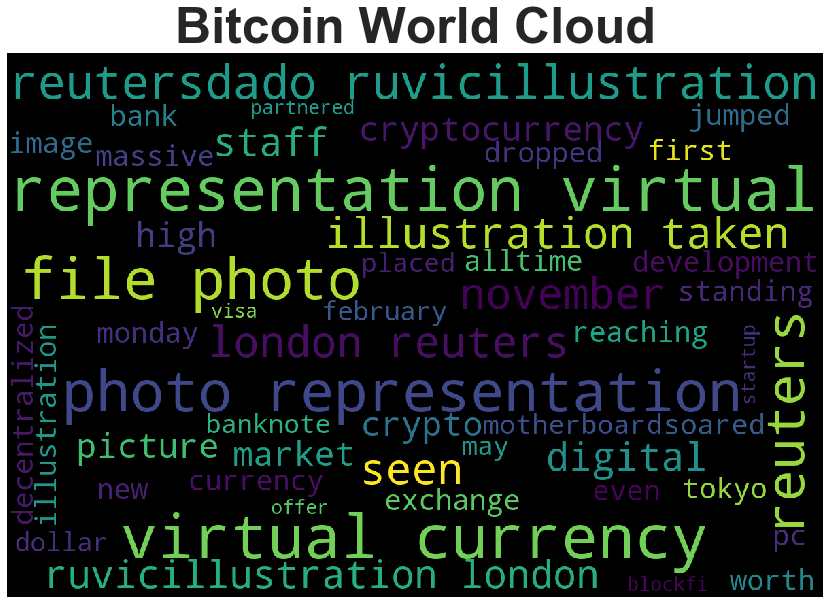

In [25]:
# Generate the Bitcoin word cloud
Bitcoin_WorldCloud = ' '.join(Top10_Words_Bitcoin)
wc = WordCloud(width=1200, height=800, max_words=50).generate(Bitcoin_WorldCloud)
plt.title("Bitcoin World Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

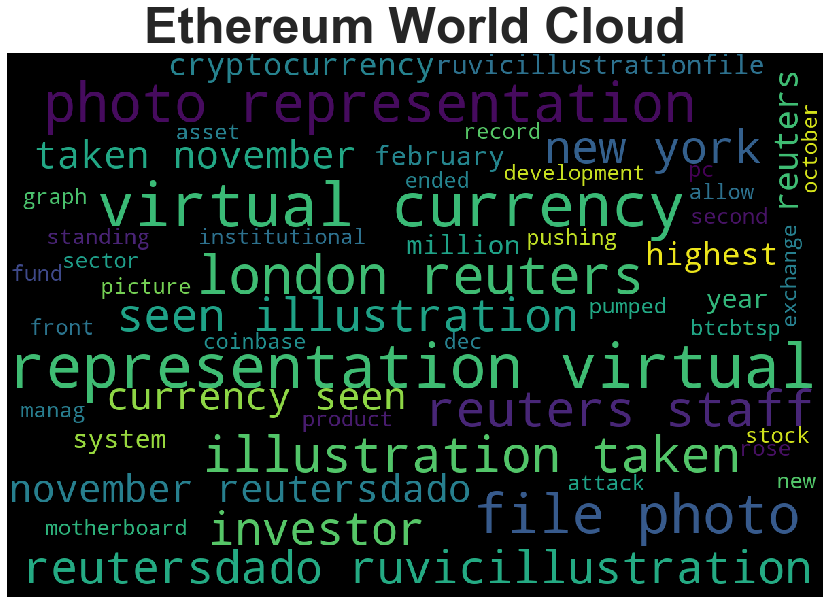

In [26]:
# Generate the Ethereum word cloud
Ethereum_WorldCloud = ' '.join(Top10_Words_Ethereum)
wc = WordCloud(width=1200, height=800, max_words=50).generate(Ethereum_WorldCloud)
plt.title("Ethereum World Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
Bitcoin_Corpus = ' '.join(Bitcoin_Sentiments_DF["Text"].values)
Bitcoin_Corpus

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the country more power and, in theory, more stability than freq… [+366 chars] If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars] Six years after the launch of the Mexico-based crypotcurrency exchange and financial services platform Bitso the company revealed it has 

In [31]:
# Run the NER processor on all of the text
NER_Processor = nlp(Bitcoin_Corpus)

# Add a title to the document
NER_Processor.user_data["title"] = "All the Article Text on BitCoin"

In [32]:
# Render the visualization
displacy.render(NER_Processor, style='ent')

In [33]:
# List all Entities
Bitcoin_Entities = [ent.text for ent in NER_Processor.ents]
Bitcoin_Entities_Set = set(Bitcoin_Entities)
Bitcoin_Entities[0:10]

['Visa',
 'first',
 'Bitcoin',
 'November 2017',
 'two-month',
 'Bitcoin',
 '10,000',
 'first',
 'the next 20 days',
 '19,665']

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
Ethereum_Corpus = ' '.join(Ethereum_Sentiments_DF["Text"].values)
Ethereum_Corpus

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, th

In [35]:
# Run the NER processor on all of the text
NER_Processor_ETH = nlp(Ethereum_Corpus)

# Add a title to the document
NER_Processor_ETH.user_data["title"] = "All the Article Text on Ethereum"

In [36]:
# Render the visualization
displacy.render(NER_Processor_ETH, style='ent')

In [37]:
# List all Entities
Ethereum_Entities = [ent.text for ent in NER_Processor_ETH.ents]
Ethereum_Entities_Set = set(Ethereum_Entities)
Ethereum_Entities_Set

{'$24 million',
 '$429 million',
 '0.00011',
 '17,000',
 '20,000',
 'Bitcoin',
 'California',
 'Coinbase',
 'ETH',
 'February 3, 2018',
 'Hala Systems',
 'Hedera',
 'LONDON',
 'May 26, 2020',
 'Monday',
 'NEW YORK',
 'November 19, 2020',
 'October',
 'October 28, 2013',
 'PayPal',
 'REUTERS/',
 'REUTERS/Stephen Lam',
 'Reuters',
 'Sunnyvale',
 'Syrians',
 'The New York Times',
 'Tuesday',
 'U.S.',
 'XRP',
 'about 5¢',
 'early February this year',
 'last month',
 'second',
 'the Generosity Network',
 'the Plug and Play Tech Center',
 'the week ended Dec. 7',
 'this year'}

In [38]:
print("MarkDown")
print("========")
print("Ethereum is the highest mean positive score coming to 0.060950")
print("Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075")
print("Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174")

MarkDown
Ethereum is the highest mean positive score coming to 0.060950
Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075
Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174
